**Interesting WebSites for Deep Learnig**

*   http://scs.ryerson.ca/~aharley/vis/conv/flat.html
*   https://playground.tensorflow.org




### Install packages and dependencies

In [ ]:
!pip install keras_tqdm
!pip install matplotlib==3.1.0
!pip uninstall -y keras-nightly
!pip uninstall -y tensorflow
!pip install h5py==2.10.0
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip uninstall -y keras
!pip install keras --upgrade
!pip install shap
!pip install lime
!pip install eli5
!pip install seaborn
!pip install sklearn
!pip install pydotplus

In [ ]:
!sudo apt-get -y install graphviz

### **Breast Cancer Wisconsin (Diagnostic) Data Set**
Processing data from:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

We read in the data and do some basic cleanup for missing values. For the description of the fields, see :

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

In summary:
```
 Sample code number          : Id number (not used and thus dropped)
 Clump Thickness             : 1–10
 Uniformity of Cell Size     : 1–10
 Uniformity of Cell Shape    : 1–10
 Marginal Adhesion           : 1–10
 Single Epithelial Cell Size : 1–10
 Bare Nuclei                 : 1–10
 Bland Chromatin             : 1–10
 Normal Nucleoli             : 1–10
 Mitoses                     : 1–10
 Class                       : 2 for benign, 4 for malignant
```



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 1000)
pd.set_option("max_rows", None)

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header=None)
data = data.rename(columns={1: "Clump Thickness", 2: "Uniformity of Cell Size", 3: "Uniformity of Cell Shape",
                   4: "Clump Marginal Adhesion",5: "Single Epithelial Cell Size",6: "Bare Nuclei",
                   7: "Bland Chromatin",8: "Normal Nucleoli",9: "Mitoses",10: "Class"})
data = data.drop(data.columns[0], axis=1)
display(data)

#Importante, olhar os dados ( algo estranho na linha 617?) (o valor da Class faz sentido?)


### **Data Cleaning and Preprocessing**

In [ ]:
df = pd.DataFrame(data)
# Notice that in column 6 there are some missing values.
display(df.loc[df["Bare Nuclei"] == "?"].head(5))

# We calculate the mean of that feature.
df_6_without_missing_values = df["Bare Nuclei"].loc[df["Bare Nuclei"] != "?"]

mean = df_6_without_missing_values.astype(int).mean()
print("Mean value: " + str(mean))

median = df_6_without_missing_values.astype(int).median()
print("Median value: " + str(median))


# Replace missing values with mean value
df["Bare Nuclei"] = df["Bare Nuclei"].replace("?", mean)
df["Bare Nuclei"] = df["Bare Nuclei"].astype(int)

# Re-arranging labels 2 -> 0 and 4 -> 1
df["Class"] = df["Class"].replace(2,0).replace(4,1)

### **Exploratory Data Analysis (EDA)**

In [ ]:
#names = [ "ID", "Clump thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class" ]
#df.columns = names[1:]
hists = df.hist(bins=20, figsize=(15,20))
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df, hue = 'Class', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)


# The diagonal diagrams describe the marginal distribution of the data in each column.
# The other diagrams describe the relationship (or lack thereof) between two variable

### **Classification**

In [ ]:
# Using information from all columns (0-9) to predict target (column 10)
X = df.iloc[:, :9]
Y = df.iloc[:, 9]

# Splitting between traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Checking the shapes to get an understanding of the problem
print( X_train.shape, X_test.shape )
print( Y_train.shape, Y_test.shape )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = dtree.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()

print(accuracy_score(Y_test, Y_pred))

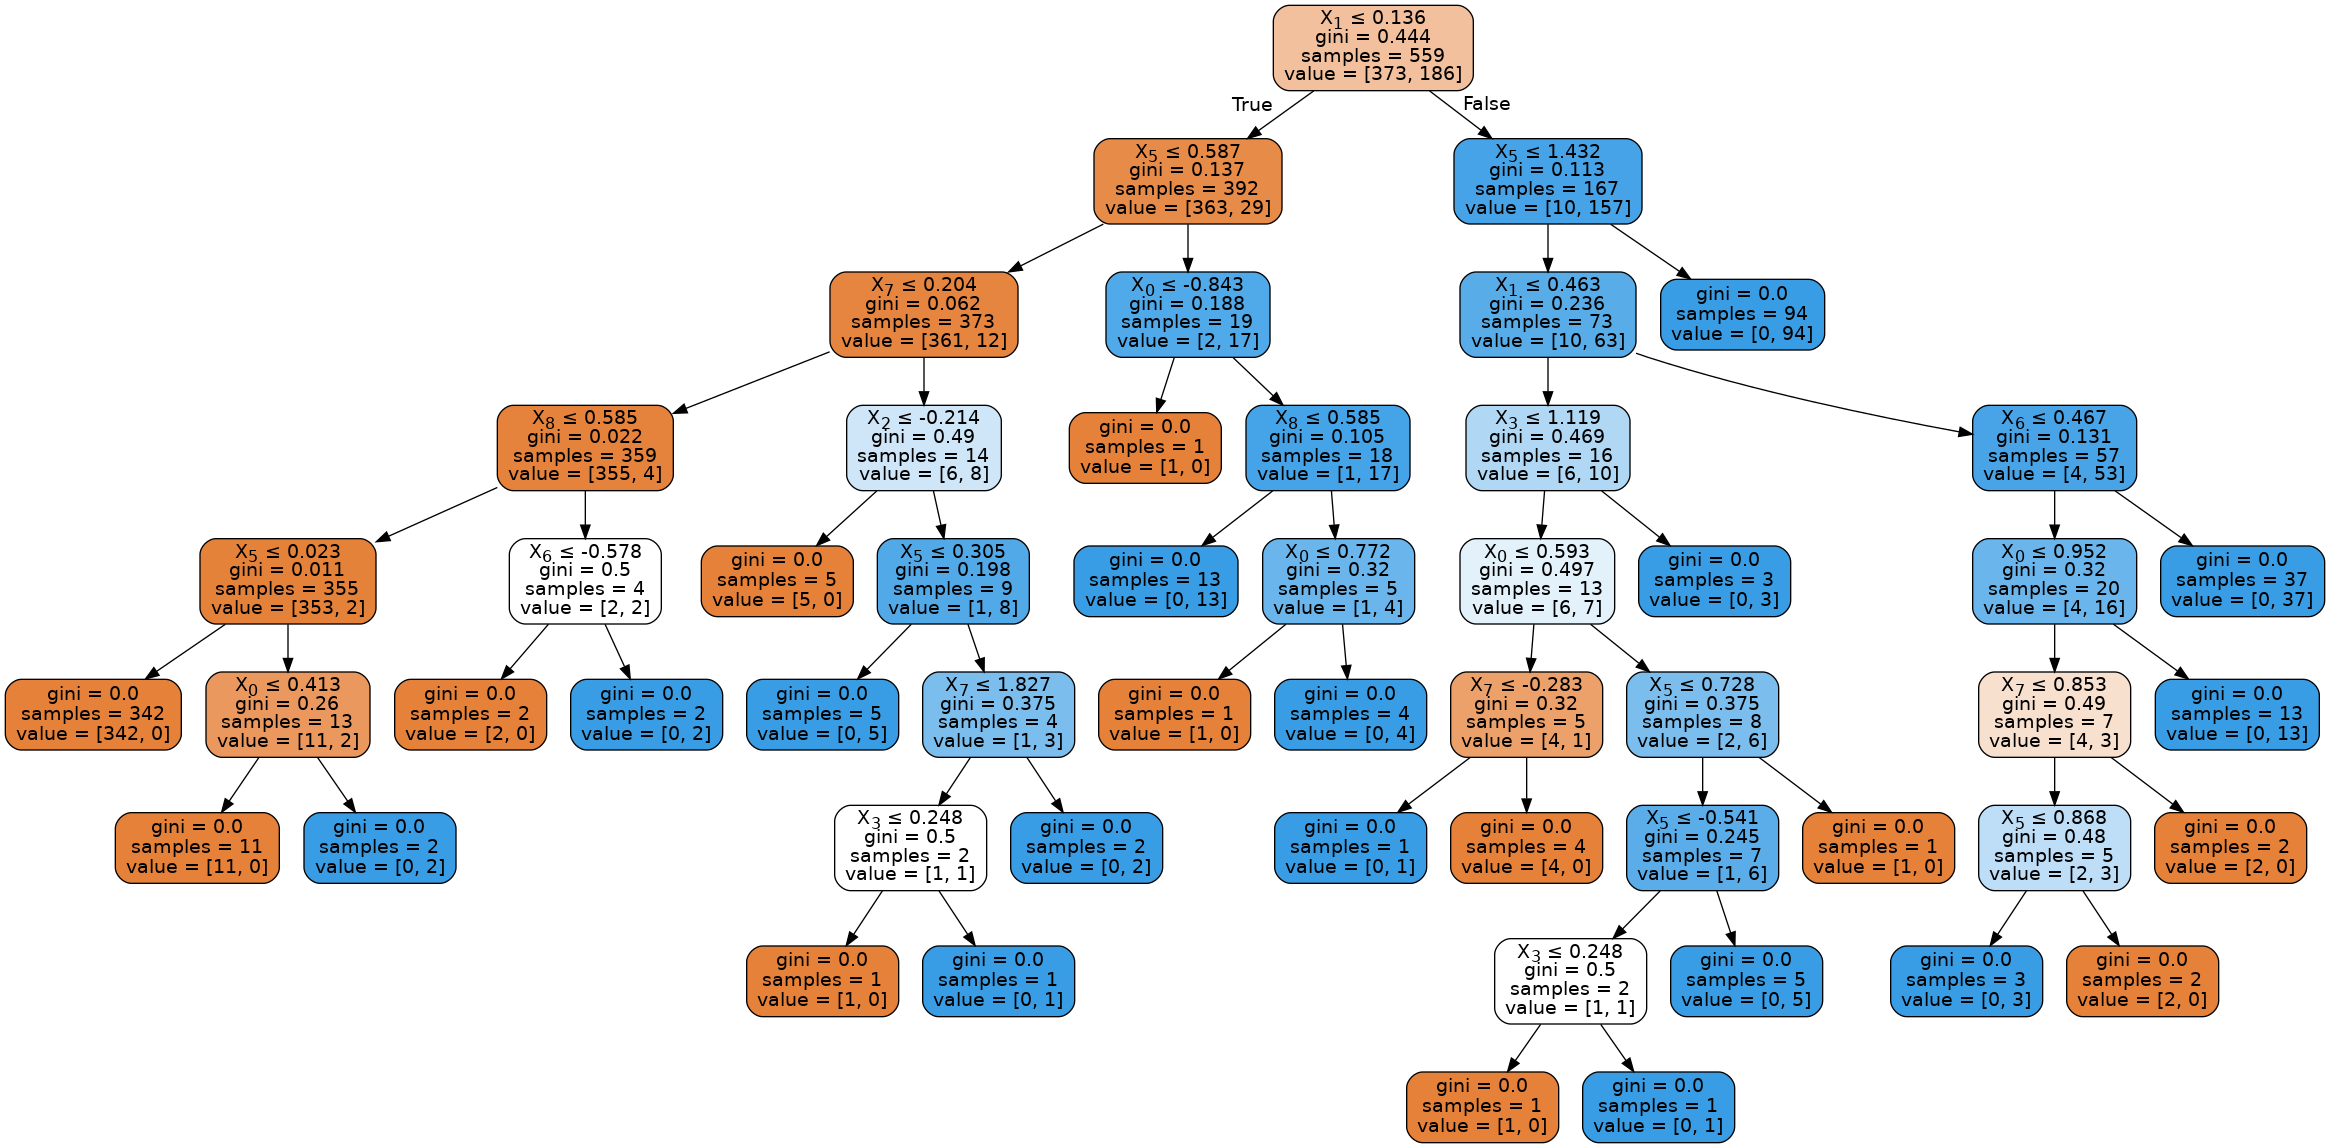

In [10]:
# Visualize Decision Tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': ["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                       'importance': dtree.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))


# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Reduction in tree impurity in decision tree")

plt.tight_layout()
# Show graphic
plt.show()



In [14]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics.scorer import make_scorer

import matplotlib.pyplot as plt
# Feature importance based on TRAINING set
#eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available
perm_test = PermutationImportance(dtree, scoring=make_scorer(accuracy_score),
                                   n_iter=50, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train, Y_train)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(9)], 'feature_name': ["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"]})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)
 

## Barplot with confidence intervals

height = ordered_df['weight']
bars = ordered_df['feature_name']
ci = 1.96 * ordered_df['std']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height, xerr=ci)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Permutation feature importance training set (decrease in accuracy)")
plt.tight_layout()

# Show graphic
plt.show()

Intercept 0.5151157953672226
Prediction_local [1.07506135]
Right: 1.0


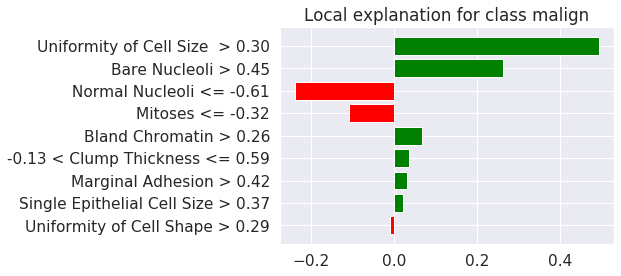

In [15]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                                                   discretize_continuous=True,
                                                   class_names=["benign", "malign"],
                                                   mode="classification",
                                                   verbose=True)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain[21,:], dtree.predict_proba, 
                                 num_features=10)
#Plot local explanation
plt = exp.as_pyplot_figure()
#plt.tight_layout()
exp.show_in_notebook(show_table=True)

#### **Multilayer Perceptron**

In [16]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from keras_tqdm import TQDMNotebookCallback

model = Sequential()
model.add(Dense(16, input_dim=(9), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

history= model.fit(X_train, Y_train,batch_size=16,validation_split=0.2, epochs=30,verbose=2)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

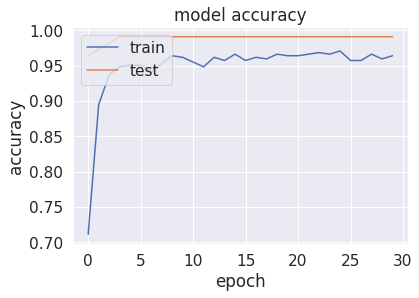

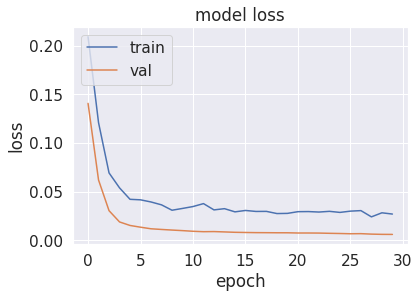

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

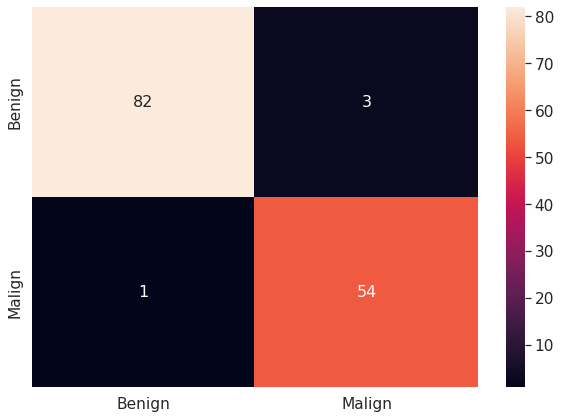

0.9714285714285714


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = model.predict(X_test,verbose=0)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()
print(accuracy_score(Y_test, Y_pred))

(1, 9)
[[0.0002172]]
Intercept 0.5570827924542939
Prediction_local [1.50260821]
Right: 0.9988998770713806


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


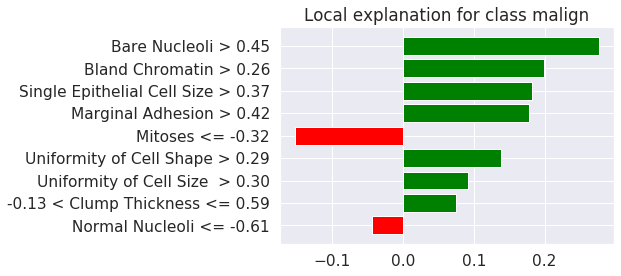

In [19]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np

def predict(qc):
    global model
    prediction_Class_1 = model.predict_proba(qc) 
    x = np.zeros((prediction_Class_1.shape[0], 1))
    probability = (x + 1) - prediction_Class_1
    final = np.append(probability,prediction_Class_1, axis=1)
    return final

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                                                   discretize_continuous=True,
                                                   class_names=["benign", "malign"],
                                                   mode="classification",
                                                   verbose=True)
print(np.array([X_test[0,:]]).shape)
print(model.predict_proba(np.array([X_test[0,:]])))

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_test[21,:], predict,num_features=10)
#Plot local explanation
plt = exp.as_pyplot_figure()
#plt.tight_layout()
exp.show_in_notebook(show_table=True)

## THE END 